## Autoregression

Autoregression modeling is a modeling technique used for time series data that assumes linear continuation of the series so that previous values in the time series can be used to predict futures values.  Some of you may be thinking that this sounds just like a linear regression – it sure does sound that way and is – in general – the same idea with additional features of the model that includes the idea of ‘lag variables’.

y = a + b1*X(t-1) + b2*X(t-2) + b3*X(t-3)

where a, b1, b2 and b3 are variables found during the training of the model and X(t-1), X(t-2) and X(t-3) are input variables at previous times within the data set.
### Forecasting Time Series with Autoregression

For this type of modeling, you need to be aware of the assumptions that are made prior to beginning working with data and autoregression modeling.

Assumptions:

    The previous time step(s) is useful in predicting the value at the next time step (dependance between values)
    Your data is stationary. A time series is stationary if is mean (and/or variance) is constant over time. There are other statistical properties to look at as well, but looking at the mean is usually the fastest/easiest.

If your time series data isn’t stationary, you’ll need to make it that way with some form of trend and seasonality removal (we’ll talk about that shortly).   If your time series data values are independent of each other, autoregression isn’t going to be a good forecasting method for that series.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/retail_sales.csv",parse_dates=["date"],index_col=["date"])

In [3]:
df.head()

,sales
date,
2009-10-01,338630
2009-11-01,339386
2009-12-01,400264
2010-01-01,314640
2010-02-01,311022


In [4]:
df.isna().sum()

sales    0
dtype: int64

<AxesSubplot:xlabel='date'>

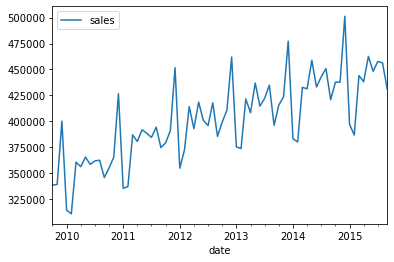

In [5]:
df.plot()

In [8]:
## checking the stationarity of data
from statsmodels.tsa.stattools import adfuller
res=adfuller(df.sales)
p_val=res[1]
if p_val>0.05:
    print("Not Stationary")
else:
    print("Stationary")

Satationary


In [9]:
new_df=df.diff()

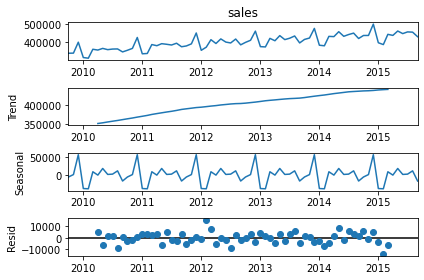

In [10]:
from statsmodels.api import tsa
decompose=tsa.seasonal_decompose(df.sales)
fig=decompose.plot()

In [11]:
import statsmodels
print(statsmodels.__version__)

0.12.0


In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

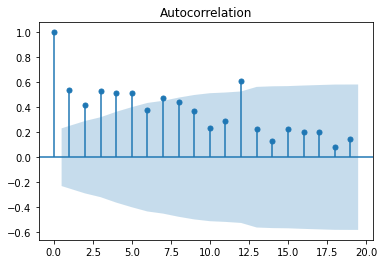

In [14]:
fig=plot_acf(df.sales)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


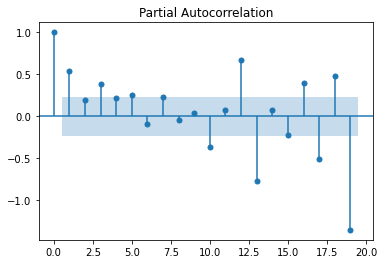

In [15]:
fig=plot_pacf(df.sales)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

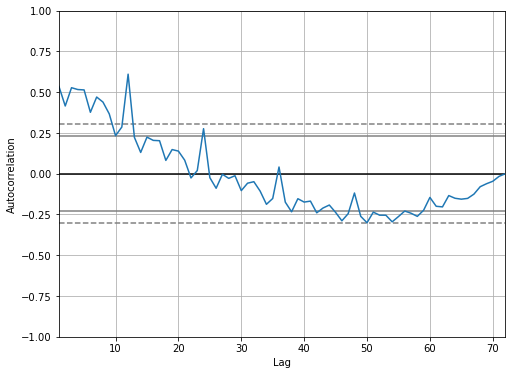

In [19]:
fig=plt.figure(figsize=(8,6))
pd.plotting.autocorrelation_plot(df.sales)

In [21]:
from statsmodels.tsa.ar_model import AR
x=df.sales
model=AR(x)
model_fit=model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [22]:
print("Lag value selected by model:",model_fit.k_ar)

Lag value selected by model: 11


In [23]:
print(model_fit.params)

const        47309.396455
L1.sales        -0.139538
L2.sales        -0.291968
L3.sales         0.133450
L4.sales         0.122387
L5.sales         0.516394
L6.sales         0.229781
L7.sales         0.527528
L8.sales         0.174068
L9.sales         0.141117
L10.sales       -0.340605
L11.sales       -0.168561
dtype: float64


In [35]:
ypred=model_fit.predict()

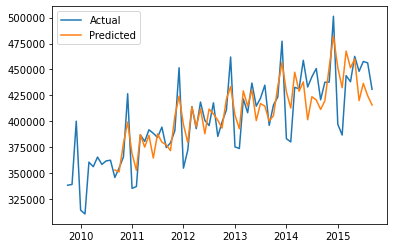

In [36]:
plt.plot(x,label="Actual")
plt.plot(ypred,label="Predicted")
plt.legend()

In [26]:
help(model_fit.predict)

Help on method predict in module statsmodels.tsa.ar_model:

predict(start=None, end=None, dynamic=False) method of statsmodels.tsa.ar_model.ARResultsWrapper instance
    predict(self, start=None, end=None, dynamic=False)
    
    Construct in-sample and out-of-sample prediction.
    
    Parameters
    ----------
    start : int, str, or datetime
        Zero-indexed observation number at which to start forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type.
    end : int, str, or datetime
        Zero-indexed observation number at which to end forecasting, ie.,
        the first forecast is start. Can also be a date string to
        parse or a datetime type.
    dynamic : bool
        The `dynamic` keyword affects in-sample prediction. If dynamic
        is False, then the in-sample lagged values are used for
        prediction. If `dynamic` is True, then in-sample forecasts are
        used in place of lagged dependent va

In [27]:
#2015-10-01 to 2015-12-01
pred=model_fit.predict(start="2015-10-01",end="2015-12-01")

In [28]:
pred

2015-10-01    422623.489515
2015-11-01    460488.527163
2015-12-01    496610.513938
Freq: MS, dtype: float64

In [34]:
#2015-10-01 to 2016-12-01
pred=model_fit.predict(start="2015-10-01",end="2016-12-01")
pred

2015-10-01    422623.489515
2015-11-01    460488.527163
2015-12-01    496610.513938
2016-01-01    455858.856345
2016-02-01    439903.788870
2016-03-01    444939.294117
2016-04-01    454000.645105
2016-05-01    461705.144121
2016-06-01    457772.119931
2016-07-01    473660.159559
2016-08-01    470906.330796
2016-09-01    450994.191586
2016-10-01    437718.773455
2016-11-01    457897.827066
2016-12-01    481920.288414
Freq: MS, dtype: float64

In [38]:
residual=model_fit.resid

<AxesSubplot:ylabel='Count'>

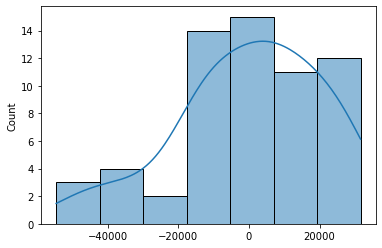

In [40]:
sns.histplot(residual,kde=True)